# Stock Prices

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [6]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') #business days
df_comp = df_comp.fillna(method='ffill')

In [9]:
df_comp['market_value'] = df_comp.ftse

In [10]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
df_comp.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [11]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size],df_comp.iloc[size:]

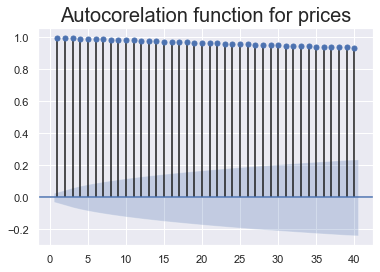

In [12]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('Autocorrelation function for prices', size=20)
plt.show()

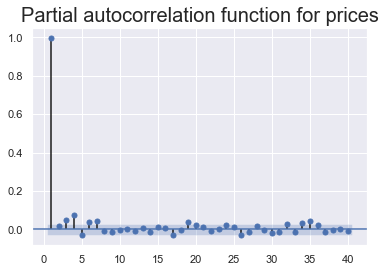

In [15]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('Partial autocorrelation function for prices', size=20)
plt.show()

In [19]:
modelAR1 = ARMA(df.market_value, order=(1,0))
# price(n+1) = constant  + factor*price(n) + shock
results_ar1 = modelAR1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.601
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sat, 02 May 2020   AIC                          55251.202
Time:                        17:22:31   BIC                          55270.766
Sample:                    01-07-1994   HQIC                         55258.058
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5080.4874    485.036     10.474      0.000    4129.834    6031.141
ar.L1.market_value     0.9985      0.001   1296.972      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
modelAR2 = ARMA(df.market_value, order=(2,0))
results_ar2 = modelAR2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sat, 02 May 2020   AIC                          55251.732
Time:                        17:22:34   BIC                          55277.817
Sample:                    01-07-1994   HQIC                         55260.872
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5048.1743    494.762     10.203      0.000    4078.459    6017.890
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4623           +0.0000j           58.4623            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
modelAR3 = ARMA(df.market_value, order=(3,0))
results_ar3 = modelAR3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.867
Method:                       css-mle   S.D. of innovations             59.178
Date:                Sat, 02 May 2020   AIC                          55241.733
Time:                        17:22:54   BIC                          55274.340
Sample:                    01-07-1994   HQIC                         55253.159
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5008.6404    522.419      9.587      0.000    3984.718    6032.562
ar.L1.market_value     0.9806      0.014     69.620      0.000       0.953       1.008
ar.L2.market_value    -0.0308      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5163j            4.5201           -0.2565
AR.3           -0.1851           +4.5163j            4.5201            0.2565
-----------------------------------------------------------------------------
"""

In [24]:
modelAR4 = ARMA(df.market_value, order=(4,0))
results_ar4 = modelAR4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sat, 02 May 2020   AIC                          55217.130
Time:                        17:24:33   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    560.003      9.089      0.000    3992.055    6187.227
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

In [31]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR,DF).round(3)
    return p

In [32]:
LLR_test(modelAR1, modelAR2,1)

ValueError: x contains a constant. Adding a constant with trend='c' is not allowed.

In [33]:
def LLR_test2(L1, L2, DF=1):
    LR = 2*(L2-L1)
    return chi2.sf(LR,DF).round(3)

LLR_test2(results_ar1.llf, results_ar2.llf, 1)

0.225

In [35]:
modelAR5 = ARMA(df.market_value, order=(5,0))
results_ar5 = modelAR5.fit()

modelAR6 = ARMA(df.market_value, order=(6,0))
results_ar6 = modelAR6.fit()

modelAR7 = ARMA(df.market_value, order=(7,0))
results_ar7 = modelAR7.fit()

modelAR8 = ARMA(df.market_value, order=(8,0))
results_ar8 = modelAR8.fit()

print(results_ar8.summary())
LLR_test2(results_ar7.llf, results_ar8.llf, 1)

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sat, 02 May 2020   AIC                          55203.478
Time:                        17:44:29   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    584.963      8.701      0.000    3943.135    6236.147
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

0.571

In [36]:
df['residual_price'] = results_ar7.resid

In [38]:
df.residual_price.mean()

0.3522453672302189

In [39]:
df.residual_price.var()

4005.944679391332

In [40]:
df.residual_price.std()

63.292532572107845

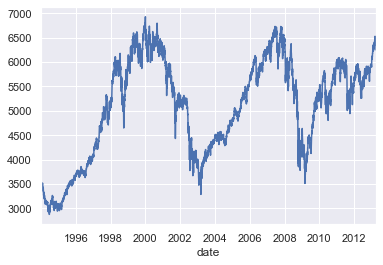

In [41]:
df.market_value.plot()
plt.title("FTSE prices")
plt.show()

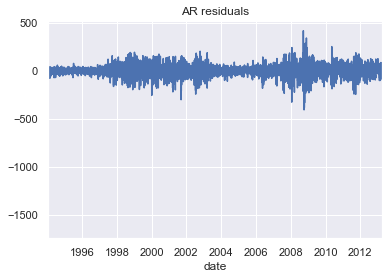

In [42]:
df.residual_price.plot()
plt.title("AR residuals")
plt.show()

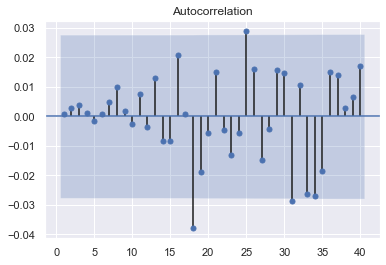

In [43]:
sgt.plot_acf(df.residual_price, zero=False, lags=40)
plt.show()

In [44]:
sts.adfuller(df.market_value) # augmented Dickey-Fuller test

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [45]:
sts.adfuller(df.residual_price) # augmented Dickey-Fuller test

(-76.07468818789927,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.415162570396)

# Stock Returns

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [47]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') #business days
df_comp = df_comp.fillna(method='ffill')

In [48]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [50]:
df['retuns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

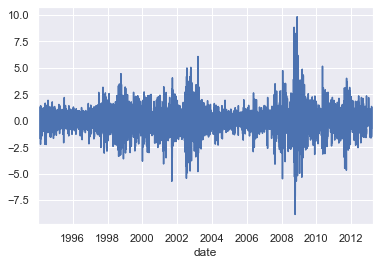

In [52]:
df.retuns.plot()

In [53]:
sts.adfuller(df.retuns) # augmented Dickey-Fuller test

(-12.7702657194972,
 7.79805833603984e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

This is the stationary time series. AR model will work for this data